Test MechincalAssemblt class
------------------------------

The goal of this routine is to test the new __MechanicalAssembly__ class in order to solve a problem with multiple elastic body which are connect by constraints.
Two meshes will be importanted and modified by __translation__ and __rot_z__ functions.



In [1]:
# importing lib and setting a list of meshes to be tested
import sys 
import amfe
import matplotlib.pyplot as plt
import numpy as np
import scipy
import copy
import pandas as pd

msh_dict = {}
msh_dict[0] = amfe.amfe_dir('meshes/test_meshes/Geom3.msh')
msh_dict[1] = amfe.amfe_dir('meshes/test_meshes/simple_2.msh')
msh_dict[2] = mshfile = amfe.amfe_dir('meshes/test_meshes/3_partition_pressure_corner.msh')
msh_dict[3] = mshfile = amfe.amfe_dir('meshes/test_meshes/geo_hole_quad_part_4.msh')
msh_dict[4] = mshfile = amfe.amfe_dir('meshes/test_meshes/2_partitions_quad_mesh.msh')
msh_dict[5] = mshfile = amfe.amfe_dir('meshes/test_meshes/2_partitions_2quad_mesh.msh')
msh_dict[6] = mshfile = amfe.amfe_dir('meshes/test_meshes/4_partitions_quad_mesh.msh')
msh_dict[7] = mshfile = amfe.amfe_dir('meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh')
msh_dict[8] = mshfile = amfe.amfe_dir('meshes/test_meshes/1_quad_elem.msh')


domain_id = {}
domain_id[0] = 3
domain_id[1] = 3
domain_id[2] = 11
domain_id[3] = 8
domain_id[4] = 3
domain_id[5] = 3
domain_id[6] = 3
domain_id[7] = 3
domain_id[8] = 6


Python was not able to load the fast fortran material routines.




*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/2_partitions_2quad_mesh.msh
Mesh H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/2_partitions_2quad_mesh.msh successfully imported. 
Assign a material to a physical group.
*************************************************************


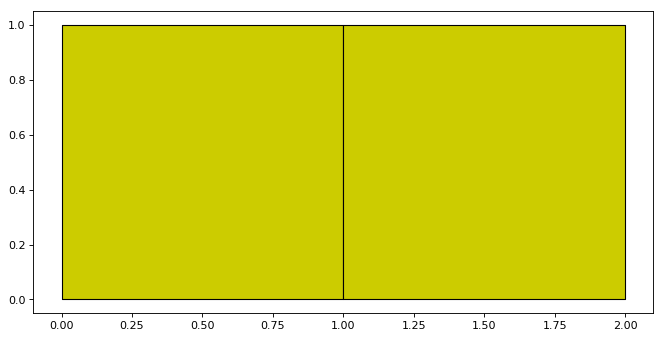

In [2]:
# select mesh to be plotted
mesh_id1 = 5
mshfile = msh_dict[mesh_id1]

m1 = amfe.Mesh()
m1.import_msh(mshfile)

domain = m1.set_domain('phys_group', domain_id[mesh_id1])

fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_submesh(domain,ax1)
plt.show()




In [3]:
m1.el_df

,idx_gmsh,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,5,6,7,8
0,1,straight_line,4,1,2,1,1,None,0,5,NaN,NaN
1,2,straight_line,4,2,2,1,1,None,2,3,NaN,NaN
2,3,Quad4,5,3,1,2,1,[-2],0,1,4.0,5.0
3,4,Quad4,5,3,1,2,2,[-1],1,2,3.0,4.0



*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/1_quad_elem.msh
Mesh H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/1_quad_elem.msh successfully imported. 
Assign a material to a physical group.
*************************************************************


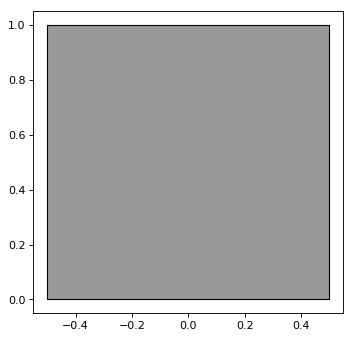

In [4]:
# select mesh to be plotted
mesh_id2 = 8
mshfile = msh_dict[mesh_id2]

m2 = amfe.Mesh()
m2.import_msh(mshfile)

domain = m2.set_domain('phys_group', domain_id[mesh_id2])
submesh3 = domain

fig, ax1=plt.subplots(1,figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_submesh(domain,ax1)
plt.show()

In [5]:
submesh3.parent_mesh.el_df

,idx_gmsh,el_type,no_of_tags,phys_group,geom_entity,5,6,7,8
0,1,straight_line,2,1,1,3,2,NaN,NaN
1,2,straight_line,2,2,2,2,1,NaN,NaN
2,3,straight_line,2,3,3,1,0,NaN,NaN
3,4,straight_line,2,4,4,0,3,NaN,NaN
4,5,Quad4,2,6,1,2,1,0.0,3.0


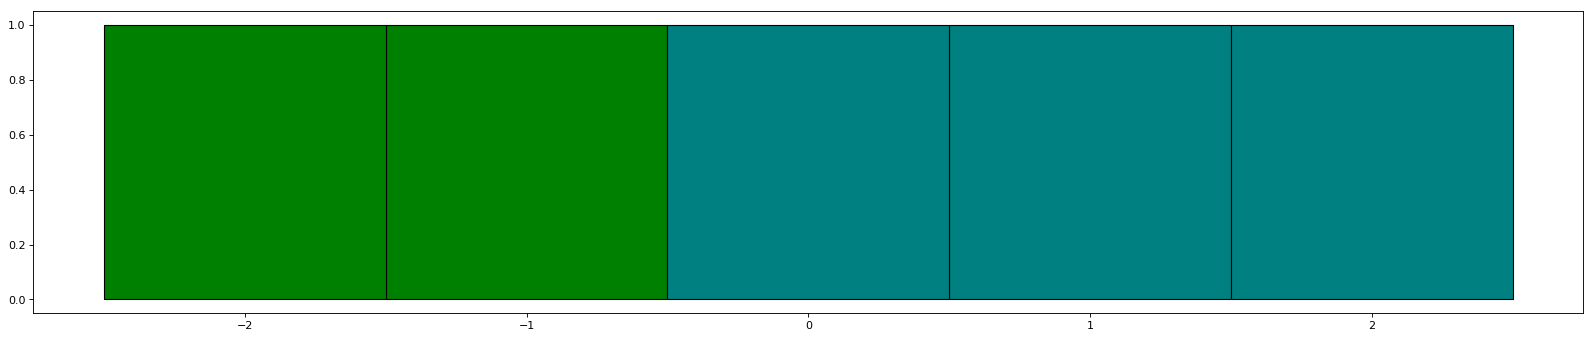

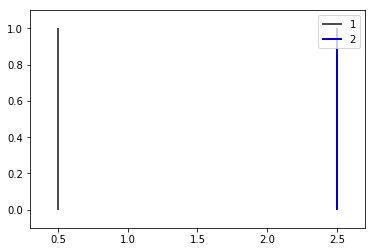

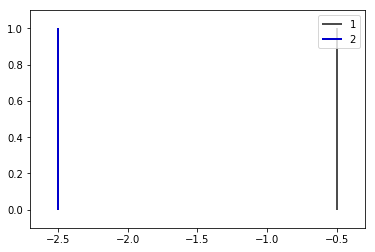

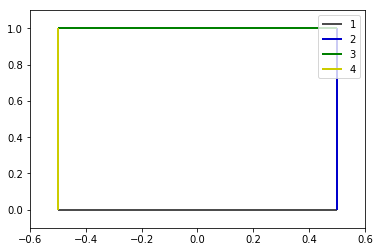

In [6]:
# applying tranlation to mesh

sys.path.append(r"H:\TUM-PC\Dokumente\Projects\FETI")
from cyclic_domain_test import *

key  = 1
x_offset = 0.5
y_offset = 0.0
z_offset = 0.0
vector_offset = [x_offset,y_offset,z_offset]
new = translation(m1.nodes,vector_offset)


# creating submesh 1
submesh1 = copy.deepcopy(m1.groups[domain_id[mesh_id1]])
submesh1.parent_mesh.nodes = new
submesh1 = m1.groups[domain_id[mesh_id1]]
submesh1.parent_mesh.nodes = new

# creating submesh 2
submesh2 = copy.deepcopy(submesh1)
new = rot_z(submesh2.parent_mesh.nodes,180,ref_point_vector=[0,0.5,0])
submesh2.parent_mesh.nodes = new

fig, ax1=plt.subplots(1,figsize=(25, 5), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_submesh(submesh1,ax1)
amfe.plot_submesh(submesh2,ax1)
amfe.plot_submesh(submesh3,ax1)



amfe.plot_boundary_1d(submesh1.parent_mesh)
amfe.plot_boundary_1d(submesh2.parent_mesh)
amfe.plot_boundary_1d(submesh3.parent_mesh)


plt.show()

In [7]:
# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)

# append domains to MechanicalAssembly
my_system = amfe.MechanicalAssembly()
my_system.append_domain(submesh1, my_material, 1)
my_system.append_domain(submesh2, my_material, 2)
my_system.append_domain(submesh3, my_material, 3)


my_system.update_global_system()

In [8]:

my_system.el_df

,idx_gmsh,local_idx,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,domain,5,6,7,8
0,1,1,straight_line,4,1,2,1,1,None,1,0,5,NaN,NaN
1,2,2,straight_line,4,2,2,1,1,None,1,2,3,NaN,NaN
2,3,3,Quad4,5,3,1,2,1,[-2],1,0,1,4.0,5.0
3,4,4,Quad4,5,3,1,2,2,[-1],1,1,2,3.0,4.0
4,5,1,straight_line,4,1,2,1,3,None,2,6,11,NaN,NaN
5,6,2,straight_line,4,2,2,1,3,None,2,8,9,NaN,NaN
6,7,3,Quad4,5,3,1,2,3,[-4],2,6,7,10.0,11.0
7,8,4,Quad4,5,3,1,2,4,[-3],2,7,8,9.0,10.0
8,9,1,straight_line,2,1,1,1,5,None,3,15,14,NaN,NaN
9,10,2,straight_line,2,2,2,1,5,None,3,14,13,NaN,NaN


In [9]:
# selectiong submeshes for boundary condition

# select submesh for Neumann B.C
sub_neu1 = my_system.get_submesh(1,2)
sub_neu2 = my_system.get_submesh(2,2)

# select submesh for Dirichlet
sub_dir1 = my_system.get_submesh(3,1)

# select submesh for interfaces
sub_int1 = my_system.get_submesh(1,1)
sub_int2 = my_system.get_submesh(3,2)

sub_int3 = my_system.get_submesh(2,1)
sub_int4 = my_system.get_submesh(3,4)


# appling bc
value = 10e8
my_system.apply_neumann_boundaries(sub_neu1,value)
my_system.apply_neumann_boundaries(sub_neu2,value)
my_system.apply_dirichlet_boundaries(sub_dir1,0.0,'xy')




In [10]:
my_system.el_df

,idx_gmsh,local_idx,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,domain,5,6,7,8
0,1,1,straight_line,4,1,2,1,1,None,1,0,5,NaN,NaN
1,2,2,straight_line,4,2,2,1,1,None,1,2,3,NaN,NaN
2,3,3,Quad4,5,3,1,2,1,[-2],1,0,1,4.0,5.0
3,4,4,Quad4,5,3,1,2,2,[-1],1,1,2,3.0,4.0
4,5,1,straight_line,4,1,2,1,3,None,2,6,11,NaN,NaN
5,6,2,straight_line,4,2,2,1,3,None,2,8,9,NaN,NaN
6,7,3,Quad4,5,3,1,2,3,[-4],2,6,7,10.0,11.0
7,8,4,Quad4,5,3,1,2,4,[-3],2,7,8,9.0,10.0
8,9,1,straight_line,2,1,1,1,5,None,3,15,14,NaN,NaN
9,10,2,straight_line,2,2,2,1,5,None,3,14,13,NaN,NaN


In [11]:
my_system.add_bonded_interface_constraint(sub_int1,sub_int2)
my_system.el_df

,idx_gmsh,local_idx,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,domain,5,6,7,8
0,1,1,straight_line,4,1,2,1,1,None,1,0,5,NaN,NaN
1,2,2,straight_line,4,2,2,1,1,None,1,2,3,NaN,NaN
2,3,3,Quad4,5,3,1,2,1,"[-2, -5]",1,0,1,4.0,5.0
3,4,4,Quad4,5,3,1,2,2,[-1],1,1,2,3.0,4.0
4,5,1,straight_line,4,1,2,1,3,None,2,6,11,NaN,NaN
5,6,2,straight_line,4,2,2,1,3,None,2,8,9,NaN,NaN
6,7,3,Quad4,5,3,1,2,3,[-4],2,6,7,10.0,11.0
7,8,4,Quad4,5,3,1,2,4,[-3],2,7,8,9.0,10.0
8,9,1,straight_line,2,1,1,1,5,None,3,15,0,NaN,NaN
9,10,2,straight_line,2,2,2,1,5,None,3,0,5,NaN,NaN


In [12]:
my_system.add_bonded_interface_constraint(sub_int3,sub_int4)
my_system.el_df

,idx_gmsh,local_idx,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,domain,5,6,7,8
0,1,1,straight_line,4,1,2,1,1,None,1,0,5,NaN,NaN
1,2,2,straight_line,4,2,2,1,1,None,1,2,3,NaN,NaN
2,3,3,Quad4,5,3,1,2,1,"[-2, -5]",1,0,1,4.0,5.0
3,4,4,Quad4,5,3,1,2,2,[-1],1,1,2,3.0,4.0
4,5,1,straight_line,4,1,2,1,3,None,2,6,11,NaN,NaN
5,6,2,straight_line,4,2,2,1,3,None,2,8,9,NaN,NaN
6,7,3,Quad4,5,3,1,2,3,"[-4, -5]",2,6,7,10.0,11.0
7,8,4,Quad4,5,3,1,2,4,[-3],2,7,8,9.0,10.0
8,9,1,straight_line,2,1,1,1,5,None,3,11,0,NaN,NaN
9,10,2,straight_line,2,2,2,1,5,None,3,0,5,NaN,NaN


Preallocating the stiffness matrix
Done preallocating stiffness matrix with 5 elements and 24 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 10 elements and 24 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 15 elements and 24 dofs.
Time taken for preallocation: 0.00 seconds.
Extract interface node from sub_1 and sub_2
Extract interface node from sub_1 and sub_5
Interface nodes from sub_2 and sub_1 already extracted
Extract interface node from sub_3 and sub_4
Extract interface node from sub_3 and sub_5
Interface nodes from sub_4 and sub_3 already extracted
Interface nodes from sub_5 and sub_1 already extracted
Interface nodes from sub_5 and sub_3 already extracted
Extract interface node from sub_1 and sub_2
Extract interface node from sub_1 and sub_5
Interface nodes from sub_2 and sub_1 already extracted
Extract interface node from

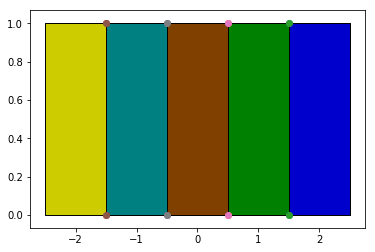

In [13]:
domain = my_system.update_domain()
my_system.split_in_partitions()

domain.groups

amfe.plot_domain(domain)
plt.show()

In [14]:
super_domain = amfe.SuperDomain(domain.groups)
B = super_domain.assemble_global_B()
Kd, fd = super_domain.assemble_block_stiffness_and_force()
G, e = super_domain.assemble_global_G_and_e()

BTGT = B.T.dot(G.T)
GB = G.dot(B)

n_dof = super_domain.total_displacement_dofs
n_int = super_domain.total_lambda_dofs
n_null = super_domain.total_alpha_dofs

block_zero_1 = np.zeros([n_null,n_int+n_null])
block_zero_2 = np.zeros([n_int,n_int+n_null])

zero_vector = np.zeros(n_int+n_null)

A1 = np.hstack((Kd,BTGT,B.T))
A2 = np.hstack((GB,block_zero_1))
A3 = np.hstack((B,block_zero_2))


A = np.vstack((A1,A2,A3))
b = np.concatenate((fd,zero_vector))

Ainv = np.linalg.pinv(A)
x = Ainv.dot(b)
#x = np.linalg.solve(A,b)

x = np.linalg.solve(A,b)
u_dual = x[:n_dof]
alpha_dual = x[n_dof:n_dof+n_null]
lambda_dual = x[n_dof+n_null:]


u_dual = x[:n_dof]
alpha_dual = x[n_dof:n_dof+n_null]
lambda_dual = x[n_dof+n_null:]

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1 elements and 8 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1 elements and 8 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1 elements and 8 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1 elements and 8 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1 elements and 8 dofs.
Time taken for preallocation: 0.00 seconds.


In [15]:
B.shape

(16, 40)

In [16]:
Kd

array([[  1.00000000e+10,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+10,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.03846154e+10, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.03846154e+10,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+10,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+10]])

In [17]:
s1 = super_domain.feti_subdomains_dict[1]
s1.B_dict
s1.dirichlet_dof

[0, 1]

In [18]:
s3 = super_domain.feti_subdomains_dict[3]
s3.B_dict
s3.dirichlet_dof

[6, 7]

In [19]:
s5 = super_domain.feti_subdomains_dict[5]
s5.B_dict
s5.dirichlet_dof

[6, 7, 0, 1]

In [20]:
s2 = super_domain.feti_subdomains_dict[2]
s2.B_dict
s2.dirichlet_dof

[]

In [21]:
s4 = super_domain.feti_subdomains_dict[4]
s4.B_dict
s4.dirichlet_dof

[]

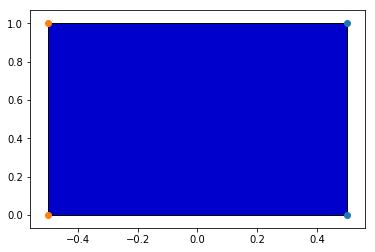

In [22]:
amfe.plot_submesh(domain.groups[5])
plt.show()

In [23]:
u = super_domain.eval_subdomain_displacement(lambda_dual,alpha_dual)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    ax = plt.axes()
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax) 
          
    plt.show()

interact(plot_static,scale=(0,1,0.1))  


A Jupyter Widget

<function __main__.plot_static>

In [24]:
s1.stiffness.todense()


matrix([[  1.03846154e+10,   3.75000000e+09,  -6.34615385e+09,
          -2.88461538e+08,  -5.19230769e+09,  -3.75000000e+09,
           1.15384615e+09,   2.88461538e+08],
        [  3.75000000e+09,   1.03846154e+10,   2.88461538e+08,
           1.15384615e+09,  -3.75000000e+09,  -5.19230769e+09,
          -2.88461538e+08,  -6.34615385e+09],
        [ -6.34615385e+09,   2.88461538e+08,   1.03846154e+10,
          -3.75000000e+09,   1.15384615e+09,  -2.88461538e+08,
          -5.19230769e+09,   3.75000000e+09],
        [ -2.88461538e+08,   1.15384615e+09,  -3.75000000e+09,
           1.03846154e+10,   2.88461538e+08,  -6.34615385e+09,
           3.75000000e+09,  -5.19230769e+09],
        [ -5.19230769e+09,  -3.75000000e+09,   1.15384615e+09,
           2.88461538e+08,   1.03846154e+10,   3.75000000e+09,
          -6.34615385e+09,  -2.88461538e+08],
        [ -3.75000000e+09,  -5.19230769e+09,  -2.88461538e+08,
          -6.34615385e+09,   3.75000000e+09,   1.03846154e+10,
           2.8

In [25]:
s1.dirichlet_dof

[0, 1]

In [26]:
fd.shape

(40,)

In [27]:
fd[:8]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [28]:
fd[8:16]

array([  0.00000000e+00,   0.00000000e+00,   5.00000000e+08,
         0.00000000e+00,   5.00000000e+08,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00])

In [29]:
G.shape

(8, 16)

In [30]:
B12 = s1.B_dict[1,2].todense()

In [31]:
B12

matrix([[0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0]])

In [32]:
s1.global_interface_nodes_dict

{2: [1, 4], 5: [0, 5]}

In [33]:
B15 = s1.B_dict[1,5].todense()

In [34]:
B15

matrix([[1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1]])

In [35]:
s2.B_dict[2,1].todense()

matrix([[-1,  0,  0,  0,  0,  0,  0,  0],
        [ 0, -1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, -1,  0],
        [ 0,  0,  0,  0,  0,  0,  0, -1]])

In [36]:
super_domain.K_list[0]

matrix([[  1.00000000e+10,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   1.00000000e+10,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   1.03846154e+10,
          -3.75000000e+09,   1.15384615e+09,  -2.88461538e+08,
          -5.19230769e+09,   3.75000000e+09],
        [  0.00000000e+00,   0.00000000e+00,  -3.75000000e+09,
           1.03846154e+10,   2.88461538e+08,  -6.34615385e+09,
           3.75000000e+09,  -5.19230769e+09],
        [  0.00000000e+00,   0.00000000e+00,   1.15384615e+09,
           2.88461538e+08,   1.03846154e+10,   3.75000000e+09,
          -6.34615385e+09,  -2.88461538e+08],
        [  0.00000000e+00,   0.00000000e+00,  -2.88461538e+08,
          -6.34615385e+09,   3.75000000e+09,   1.03846154e+10,
           2.8

In [37]:
pd.DataFrame(super_domain.K_list[0])

,0,1,2,3,4,5,6,7
0,1.000000e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,1.000000e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,1.038462e+10,-3.750000e+09,1.153846e+09,-2.884615e+08,-5.192308e+09,3.750000e+09
3,0.000000e+00,0.000000e+00,-3.750000e+09,1.038462e+10,2.884615e+08,-6.346154e+09,3.750000e+09,-5.192308e+09
4,0.000000e+00,0.000000e+00,1.153846e+09,2.884615e+08,1.038462e+10,3.750000e+09,-6.346154e+09,-2.884615e+08
5,0.000000e+00,0.000000e+00,-2.884615e+08,-6.346154e+09,3.750000e+09,1.038462e+10,2.884615e+08,1.153846e+09
6,0.000000e+00,0.000000e+00,-5.192308e+09,3.750000e+09,-6.346154e+09,2.884615e+08,1.038462e+10,-3.750000e+09
7,0.000000e+00,0.000000e+00,3.750000e+09,-5.192308e+09,-2.884615e+08,1.153846e+09,-3.750000e+09,1.038462e+10


In [38]:
pd.DataFrame(super_domain.K_list[1])

,0,1,2,3,4,5,6,7
0,1.038462e+10,3.750000e+09,-6.346154e+09,-2.884615e+08,-5.192308e+09,-3.750000e+09,1.153846e+09,2.884615e+08
1,3.750000e+09,1.038462e+10,2.884615e+08,1.153846e+09,-3.750000e+09,-5.192308e+09,-2.884615e+08,-6.346154e+09
2,-6.346154e+09,2.884615e+08,1.038462e+10,-3.750000e+09,1.153846e+09,-2.884615e+08,-5.192308e+09,3.750000e+09
3,-2.884615e+08,1.153846e+09,-3.750000e+09,1.038462e+10,2.884615e+08,-6.346154e+09,3.750000e+09,-5.192308e+09
4,-5.192308e+09,-3.750000e+09,1.153846e+09,2.884615e+08,1.038462e+10,3.750000e+09,-6.346154e+09,-2.884615e+08
5,-3.750000e+09,-5.192308e+09,-2.884615e+08,-6.346154e+09,3.750000e+09,1.038462e+10,2.884615e+08,1.153846e+09
6,1.153846e+09,-2.884615e+08,-5.192308e+09,3.750000e+09,-6.346154e+09,2.884615e+08,1.038462e+10,-3.750000e+09
7,2.884615e+08,-6.346154e+09,3.750000e+09,-5.192308e+09,-2.884615e+08,1.153846e+09,-3.750000e+09,1.038462e+10


In [39]:
pd.DataFrame(super_domain.K_list[2])

,0,1,2,3,4,5,6,7
0,1.038462e+10,3.750000e+09,-6.346154e+09,-2.884615e+08,-5.192308e+09,-3.750000e+09,0.000000e+00,0.000000e+00
1,3.750000e+09,1.038462e+10,2.884615e+08,1.153846e+09,-3.750000e+09,-5.192308e+09,0.000000e+00,0.000000e+00
2,-6.346154e+09,2.884615e+08,1.038462e+10,-3.750000e+09,1.153846e+09,-2.884615e+08,0.000000e+00,0.000000e+00
3,-2.884615e+08,1.153846e+09,-3.750000e+09,1.038462e+10,2.884615e+08,-6.346154e+09,0.000000e+00,0.000000e+00
4,-5.192308e+09,-3.750000e+09,1.153846e+09,2.884615e+08,1.038462e+10,3.750000e+09,0.000000e+00,0.000000e+00
5,-3.750000e+09,-5.192308e+09,-2.884615e+08,-6.346154e+09,3.750000e+09,1.038462e+10,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+10,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+10


In [40]:
pd.DataFrame(super_domain.K_list[3])

,0,1,2,3,4,5,6,7
0,1.038462e+10,3.750000e+09,-6.346154e+09,-2.884615e+08,-5.192308e+09,-3.750000e+09,1.153846e+09,2.884615e+08
1,3.750000e+09,1.038462e+10,2.884615e+08,1.153846e+09,-3.750000e+09,-5.192308e+09,-2.884615e+08,-6.346154e+09
2,-6.346154e+09,2.884615e+08,1.038462e+10,-3.750000e+09,1.153846e+09,-2.884615e+08,-5.192308e+09,3.750000e+09
3,-2.884615e+08,1.153846e+09,-3.750000e+09,1.038462e+10,2.884615e+08,-6.346154e+09,3.750000e+09,-5.192308e+09
4,-5.192308e+09,-3.750000e+09,1.153846e+09,2.884615e+08,1.038462e+10,3.750000e+09,-6.346154e+09,-2.884615e+08
5,-3.750000e+09,-5.192308e+09,-2.884615e+08,-6.346154e+09,3.750000e+09,1.038462e+10,2.884615e+08,1.153846e+09
6,1.153846e+09,-2.884615e+08,-5.192308e+09,3.750000e+09,-6.346154e+09,2.884615e+08,1.038462e+10,-3.750000e+09
7,2.884615e+08,-6.346154e+09,3.750000e+09,-5.192308e+09,-2.884615e+08,1.153846e+09,-3.750000e+09,1.038462e+10


In [41]:
pd.DataFrame(super_domain.K_list[4])

,0,1,2,3,4,5,6,7
0,1.000000e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,1.000000e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,1.038462e+10,3.750000e+09,-6.346154e+09,-2.884615e+08,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,3.750000e+09,1.038462e+10,2.884615e+08,1.153846e+09,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,-6.346154e+09,2.884615e+08,1.038462e+10,-3.750000e+09,0.000000e+00,0.000000e+00
5,0.000000e+00,0.000000e+00,-2.884615e+08,1.153846e+09,-3.750000e+09,1.038462e+10,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+10,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+10


In [42]:
pd.DataFrame(super_domain.fext_list)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,500000000.0,0.0,500000000.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-500000000.0,0.0,-500000000.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
u_dual[0:16]

array([ 0.        ,  0.        ,  0.04727292, -0.03060078,  0.07953186,
       -0.04539089,  0.03225894, -0.01147378,  0.04727292, -0.03060078,
        0.09494203, -0.06319723,  0.12720098, -0.07731233,  0.07953186,
       -0.04539089])

In [44]:
u_dual[16:32]

array([-0.03225894, -0.01147378, -0.07953186, -0.04539089, -0.04727292,
       -0.03060078,  0.        ,  0.        , -0.07953186, -0.04539089,
       -0.12720098, -0.07731233, -0.09494203, -0.06319723, -0.04727292,
       -0.03060078])

In [45]:
u_dual[32:]

array([ 0.        ,  0.        ,  0.03225894, -0.01147378, -0.03225894,
       -0.01147378,  0.        ,  0.        ])

In [46]:
x = np.linalg.solve(A,b)
u_dual = x[:n_dof]
alpha_dual = x[n_dof:n_dof+n_null]
lambda_dual = x[n_dof+n_null:]

In [47]:
u_dual

array([ 0.        ,  0.        ,  0.04727292, -0.03060078,  0.07953186,
       -0.04539089,  0.03225894, -0.01147378,  0.04727292, -0.03060078,
        0.09494203, -0.06319723,  0.12720098, -0.07731233,  0.07953186,
       -0.04539089, -0.03225894, -0.01147378, -0.07953186, -0.04539089,
       -0.04727292, -0.03060078,  0.        ,  0.        , -0.07953186,
       -0.04539089, -0.12720098, -0.07731233, -0.09494203, -0.06319723,
       -0.04727292, -0.03060078,  0.        ,  0.        ,  0.03225894,
       -0.01147378, -0.03225894, -0.01147378,  0.        ,  0.        ])

In [48]:
pd.DataFrame(u)

,1,2,3,4,5
0,0.000000e+00,-3.174179e+09,6.633894e+08,2.322123e+08,0.000000
1,0.000000e+00,-1.900306e+09,-5.103914e-02,-4.223604e+08,0.000000
2,-5.544569e-01,-3.174179e+09,6.633894e+08,2.322123e+08,0.493256
3,-1.333972e+09,-2.379134e+09,6.633894e+08,2.524699e+08,-0.210222
4,1.333972e+09,-2.695351e+09,-8.172320e-02,-4.426180e+08,0.386005
5,-1.333972e+09,-2.379134e+09,6.633894e+08,2.524699e+08,0.174455
6,1.333972e+09,-2.695351e+09,0.000000e+00,-4.426180e+08,0.000000
7,-1.573926e-01,-1.900306e+09,0.000000e+00,-4.223604e+08,0.000000


In [49]:
s1.displacement

array([  0.00000000e+00,   0.00000000e+00,  -5.54456903e-01,
        -1.33397202e+09,   1.33397202e+09,  -1.33397202e+09,
         1.33397202e+09,  -1.57392572e-01])

In [50]:
s1

In [51]:

def plot_1(scale=0):
    ax = plt.axes()
    #amfe.plot_deformed_subdomain(s5,scale,ax)
    amfe.plot_deformed_subdomain(s1,scale*0.000001,ax)

    plt.show()
    
interact(plot_1,scale=(0,0.001,0.00001))

A Jupyter Widget

<function __main__.plot_1>

In [52]:
pd.DataFrame(B.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
s1.B_dict[1,2].todense()

matrix([[0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0]])

In [54]:
s1.B_dict[1,5].todense()

matrix([[1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1]])

In [55]:
np.linalg.matrix_rank(A)

48

In [56]:
A.shape

(64, 64)

In [57]:
super_domain.alpha_global_dict

{1: array([0]), 2: array([1, 2, 3]), 3: array([4]), 4: array([5, 6, 7])}

In [58]:
s2.G_dict

{}

In [59]:
#local problem
s2.solve_local_displacement(0*np.matrix(lambda_dual).T,super_domain.lambda_global_dict)

AttributeError: 'dict' object has no attribute 'shape'

In [ ]:
s2.displacement

In [ ]:

def plot_2(scale=0):
    ax = plt.axes()
    #amfe.plot_deformed_subdomain(s5,scale,ax)
    amfe.plot_deformed_subdomain(s2,scale,ax)

    plt.show()
    
interact(plot_2,scale=(0,1,0.01))

In [ ]:
B = super_domain.assemble_global_B()
Kd, fd = super_domain.assemble_block_stiffness_and_force()
G, e = super_domain.assemble_global_G_and_e()

BTGT = B.T.dot(G.T)
GB = G.dot(B)

n_dof = super_domain.total_displacement_dofs
n_int = super_domain.total_lambda_dofs
n_null = super_domain.total_alpha_dofs

block_zero_1 = np.zeros([n_null,n_int+n_null])
block_zero_2 = np.zeros([n_int,n_int+n_null])
block_zero_3 = np.zeros([n_int,n_int])

zero_vector1 = np.zeros(n_int+n_null)
zero_vector2 = np.zeros(n_int)

A1 = np.hstack((Kd,B.T))
A3 = np.hstack((B,block_zero_3))


A = np.vstack((A1,A3))
b = np.concatenate((fd,zero_vector2))

Ainv = np.linalg.pinv(A)
x = Ainv.dot(b)
#x = np.linalg.solve(A,b)

u_dual = x[:n_dof]
alpha_dual = x[n_dof:n_dof+n_null]
lambda_dual = x[n_dof+n_null:]


u_dual = x[:n_dof]
lambda_dual = x[n_dof:]

In [ ]:
u_dual

In [ ]:
lambda_dual

In [ ]:
u = super_domain.eval_subdomain_displacement(lambda_dual,alpha_dual*0.0000000000001)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    ax = plt.axes()
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax) 
          
    plt.show()

interact(plot_static,scale=(0,10,1))  

In [ ]:
alpha_dual

In [ ]:
B = super_domain.assemble_global_B()
Kd, fd = super_domain.assemble_block_stiffness_and_force()
G, e = super_domain.assemble_global_G_and_e()
F, d = super_domain.assemble_F_and_d()

n_null = len(e) # null space size
n_int = len(d) # interface size
Zeros = np.zeros([n_null ,n_null])

A1 = np.hstack((F,G.T))
A2 = np.hstack((G,Zeros))

A = np.vstack((A1,A2))
b = np.concatenate((d,e))

# Dual interface problem
x = np.linalg.solve(A,b)
global_lambda = x[:n_int]
alpha = x[n_int:]

global_alpha = alpha

u = super_domain.eval_subdomain_displacement(global_lambda,alpha)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_static(scale=0):
    connectivity = {}
    nodes = {}
    ax = plt.axes()
    for sub_key in super_domain.domains_key_list:
        sub = super_domain.get_feti_subdomains(sub_key)
        connectivity[sub_key] = sub.mesh.connectivity
        nodes[sub_key] = sub.mesh.nodes
        quad, ax = amfe.plotDeformQuadMesh(connectivity[sub_key],nodes[sub_key],u[sub_key],scale,ax) 
          
    plt.show()

interact(plot_static,mode=(0,10,1),scale=(0,10,1))          

In [ ]:
s1.B_dict[1,5].todense()

In [ ]:
s5.B_dict[5,1].todense()

In [ ]:
pd.DataFrame(s5.stiffness.todense())

In [ ]:
s5.B_dict[5,3].todense()